In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import numpy as np
import theano
import theano.tensor as T

from sklearn.datasets import fetch_mldata

rng = np.random.RandomState(1234)

mnist = fetch_mldata('MNIST original')

mnist_x, mnist_y = mnist.data.astype("float32")/ 255.0, mnist.target.astype("int32")

In [9]:
def plot_sample(x, axis):
    img = x.reshape(28, 28)
    axis.imshow(img,cmap='gray')

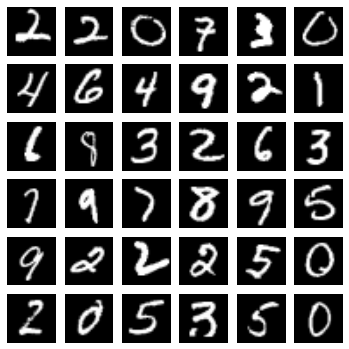

In [14]:
fig = plt.figure(figsize=(6, 6))

for i in range(36):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    plot_sample(mnist_x[np.random.randint(0, 60000)], ax)

In [ ]:
import numpy as np
import theano
import theano.tensor as T
from collections import OrderedDict


# 変数宣言
x = T.fvector('x') # 入力ベクトル
t = T.fvector('t') # 正解ベクトル

W = theano.shared(rng.uniform(low=-0.08, high=0.08, size=(5, 3)), name='W')
b = theano.shared(np.zeros(3), name='b')


# 計算
y = T.dot(x, W) + b

cost = T.sum((y - t) ** 2)

gW, gb = T.grad(cost, [W, b])

updates = OrderedDict({W: W - 0.01 * gW, b: b - 0.01 * gb})


# 数式の構築
f = theano.function(
    inputs=[x, t], 
    outputs=[cost, gW, gb], 
    updates=updates, 
    allow_input_downcast=True
)

In [16]:
rng.uniform(low=-0.08, high=0.08, size=(5, 3))

array([[-0.04935689,  0.0195374 , -0.00996356],
       [ 0.04565737,  0.04479613, -0.03638518],
       [-0.03576572,  0.04829955,  0.0733023 ],
       [ 0.06014922, -0.02274924,  0.00015922],
       [ 0.02935407,  0.03403232, -0.02075988]])